<a href="https://colab.research.google.com/github/osazeimalele/Digital-Twin/blob/master/Digital_Twin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path
# directory_path = '/content/drive/My Drive/my_directory/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:


# Define the directory paths
directory_paths = [
   '/content/drive/MyDrive/Task 2 - Fuel System Datasets - Healthy Conditions',
   '/content/drive/MyDrive/Task 3 - Fuel System Datasets - F1 - Clogged Filter',
   '/content/drive/MyDrive/Task 3 - Fuel System Datasets - F3 - Stuck Valve',
   '/content/drive/MyDrive/Task 3 - Fuel System Datasets - F4 - Leaking Pipe',
   '/content/drive/MyDrive/Task 3 -Fuel System Datasets - F5 - Clogged Injector',
   '/content/drive/MyDrive/Task3 -Fuel System Datasets - F2 - Degraded Pump'
]

# Define the corresponding keys for the folders
folder_keys = {
    'Task 2 - Fuel System Datasets - Healthy Conditions': 'healthy',
    'Task 3 - Fuel System Datasets - F1 - Clogged Filter': 'clogged filter',
    'Task 3 - Fuel System Datasets - F3 - Stuck Valve': 'stuck valve',
    'Task 3 - Fuel System Datasets - F4 - Leaking Pipe': 'leaking pipe',
    'Task 3 -Fuel System Datasets - F5 - Clogged Injector': 'clogged injector',
    'Task3 -Fuel System Datasets - F2 - Degraded Pump': 'degraded pump'
}

# Define the columns for each condition
condition_columns = {
    'healthy': 'Dpv1',
    'clogged filter': 'Dpv1',
    'stuck valve': 'Dpv2',
    'leaking pipe': 'Dpv3',
    'clogged injector': 'Dpv4',
    'degraded pump': 'Dpv5'
}

# Create a dictionary to store DataFrames for each directory
dfs_by_folder = {}

# Create a list to store the plot data
plot_data = []

# Loop through each directory
for directory_path in directory_paths:
    # Extract the folder name
    folder_name = os.path.basename(directory_path)

    # List all files in the directory
    file_names = os.listdir(directory_path)

    # Create an empty list to store DataFrames for the current directory
    dfs = []

    # Read the contents of each file and create a DataFrame, skipping the first 23 rows
    for file_name in file_names:
        # Construct the full path to the file
        file_path = os.path.join(directory_path, file_name)

        # Check if it's a file (not a directory)
        if os.path.isfile(file_path):
            # Read the file and create a DataFrame, skipping the first 23 rows, and using '\t' as the delimiter
            df = pd.read_csv(file_path, skiprows=23, delimiter='\t')

            # Add 1.01325 to specific columns
            columns_to_add = ['Pre-Filter Pressure Transducer', 'Post Filter Pressure Transducer', 'End Pressure']
            df[columns_to_add] += 1.01325

            # Append the DataFrame to the list
            dfs.append(df)


    # Concatenate all DataFrames for the current directory into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    # Store the combined DataFrame in the dictionary with the folder key as the key
    dfs_by_folder[folder_keys[folder_name]] = combined_df

# Rename the columns for each folder and plot the data
for folder_name, df in dfs_by_folder.items():
    # Define column renaming dictionary
    column_names = {
        'X_Value': 'Time',
        'Untitled': 'Pump Speed',
        'Untitled 1': 'Dpv1',
        'Untitled 2': 'Dpv2',
        'Untitled 3': 'Dpv3',
        'Untitled 4': 'Dpv4',
        'Untitled 5': 'Dpv5',
    }

    # Rename columns
    df.rename(columns=column_names, inplace=True)

    # Group by the specified column for the condition
    grouped_df = df.groupby(condition_columns[folder_name]).agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
    grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Display the DataFrames as tables
for folder_name, df in dfs_by_folder.items():
    print("Folder:", folder_name)
    display(df)

Folder: healthy


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.906258,1.859538,0.323115,0.218264,0.106259,0.710744,1.130736,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
1,0.001,1.901981,1.871383,0.322984,0.218395,0.106943,0.716627,1.133232,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
2,0.002,1.913496,1.875002,0.322458,0.218395,0.106669,0.715860,1.133232,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
3,0.003,1.920077,1.887833,0.321407,0.218921,0.106806,0.713430,1.135072,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
4,0.004,1.907574,1.876976,0.321670,0.219052,0.107079,0.712151,1.136254,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,299.995,1.897375,1.860854,0.319962,0.218527,0.106806,0.718546,1.123509,399.858184,100.0,0.0,100.0,0.0,100.0,NaN
359996,299.996,1.898362,1.846707,0.319699,0.217738,0.106395,0.718034,1.124560,399.858184,100.0,0.0,100.0,0.0,100.0,NaN
359997,299.997,1.896717,1.846049,0.320487,0.218001,0.106806,0.716500,1.127845,399.858184,100.0,0.0,100.0,0.0,100.0,NaN
359998,299.998,1.900336,1.843416,0.321013,0.218395,0.106532,0.714965,1.127845,399.858184,100.0,0.0,100.0,0.0,100.0,NaN


Folder: clogged filter


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.901981,1.858880,0.318516,0.219315,0.107353,0.718162,1.127057,399.670938,90.0,0.0,100.0,0.0,100.0,NaN
1,0.001,1.906587,1.860525,0.318122,0.219446,0.107079,0.716627,1.128239,399.670938,90.0,0.0,100.0,0.0,100.0,NaN
2,0.002,1.904942,1.867105,0.318648,0.220103,0.107079,0.715093,1.125086,399.670938,90.0,0.0,100.0,0.0,100.0,NaN
3,0.003,1.899020,1.842100,0.318516,0.219972,0.107079,0.713686,1.123641,399.670938,90.0,0.0,100.0,0.0,100.0,NaN
4,0.004,1.896059,1.851971,0.318779,0.219841,0.107079,0.712151,1.116414,399.670938,90.0,0.0,100.0,0.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,59.995,1.952320,1.369309,0.182788,0.119720,0.055100,0.567362,1.062018,399.440118,20.0,0.0,100.0,0.0,100.0,NaN
479996,59.996,1.943108,1.363386,0.183313,0.119325,0.055374,0.569025,1.073580,399.440118,20.0,0.0,100.0,0.0,100.0,NaN
479997,59.997,1.946069,1.359438,0.184233,0.119063,0.055237,0.572095,1.075026,399.440118,20.0,0.0,100.0,0.0,100.0,NaN
479998,59.998,1.937843,1.367992,0.185416,0.120114,0.053048,0.570816,1.075683,399.440118,20.0,0.0,100.0,0.0,100.0,NaN


Folder: stuck valve


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.928960,1.888491,0.426652,0.181605,0.087519,0.665338,1.105640,400.681827,100.0,0.0,50.0,0.0,100.0,NaN
1,0.001,1.925341,1.892439,0.426784,0.181343,0.087108,0.663931,1.104983,400.681827,100.0,0.0,50.0,0.0,100.0,NaN
2,0.002,1.926328,1.891123,0.426127,0.180948,0.086972,0.662524,1.106297,400.681827,100.0,0.0,50.0,0.0,100.0,NaN
3,0.003,1.930276,1.892768,0.426521,0.181211,0.087519,0.668151,1.104195,400.681827,100.0,0.0,50.0,0.0,100.0,NaN
4,0.004,1.930605,1.901652,0.425995,0.180554,0.086835,0.667512,1.102618,400.681827,100.0,0.0,50.0,0.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,59.995,1.944424,1.909548,0.749615,0.106843,0.048534,0.555595,1.056631,401.289745,100.0,0.0,20.0,0.0,100.0,NaN
479996,59.996,1.940804,1.913496,0.751454,0.107763,0.048945,0.554572,1.057156,401.289745,100.0,0.0,20.0,0.0,100.0,NaN
479997,59.997,1.932250,1.909548,0.752768,0.107106,0.048671,0.553549,1.062018,401.289745,100.0,0.0,20.0,0.0,100.0,NaN
479998,59.998,1.933237,1.907903,0.755002,0.107631,0.049082,0.556874,1.061886,401.289745,100.0,0.0,20.0,0.0,100.0,NaN


Folder: leaking pipe


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.928960,1.900336,0.294209,0.202103,0.098051,0.687081,1.125612,400.187421,100.0,0.0,100.0,20.0,100.0,NaN
1,0.001,1.932579,1.888491,0.294471,0.201183,0.098462,0.685547,1.126006,400.187421,100.0,0.0,100.0,20.0,100.0,NaN
2,0.002,1.936527,1.892110,0.294209,0.201708,0.098051,0.683628,1.126794,400.187421,100.0,0.0,100.0,20.0,100.0,NaN
3,0.003,1.929947,1.887833,0.293683,0.201577,0.098188,0.689384,1.125612,400.187421,100.0,0.0,100.0,20.0,100.0,NaN
4,0.004,1.929289,1.880266,0.294997,0.201446,0.097778,0.687849,1.124298,400.187421,100.0,0.0,100.0,20.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,59.995,1.911193,1.862499,0.157561,0.046665,0.017073,0.346583,1.013403,401.066972,100.0,0.0,100.0,90.0,100.0,NaN
479996,59.996,1.915141,1.853616,0.158086,0.047454,0.016937,0.345626,1.013403,401.066972,100.0,0.0,100.0,90.0,100.0,NaN
479997,59.997,1.916128,1.856248,0.157955,0.047585,0.017757,0.345078,1.013271,401.066972,100.0,0.0,100.0,90.0,100.0,NaN
479998,59.998,1.910864,1.856248,0.157561,0.046928,0.017210,0.344394,1.013403,401.066972,100.0,0.0,100.0,90.0,100.0,NaN


Folder: clogged injector


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.925670,1.881911,0.345320,0.254791,0.125409,0.657280,1.111421,399.759744,100.0,0.0,100.0,0.0,60.0,NaN
1,0.001,1.927973,1.882240,0.345583,0.255185,0.125819,0.660477,1.114312,399.759744,100.0,0.0,100.0,0.0,60.0,NaN
2,0.002,1.926657,1.890794,0.345057,0.255185,0.126230,0.661756,1.114575,399.759744,100.0,0.0,100.0,0.0,60.0,NaN
3,0.003,1.925999,1.878621,0.345977,0.255711,0.125956,0.660477,1.114443,399.759744,100.0,0.0,100.0,0.0,60.0,NaN
4,0.004,1.922709,1.882898,0.346634,0.255711,0.125819,0.658942,1.112998,399.759744,100.0,0.0,100.0,0.0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,59.995,1.930276,1.893427,0.466464,0.391045,0.196675,0.611617,1.101304,399.789711,100.0,0.0,100.0,0.0,40.0,NaN
479996,59.996,1.927973,1.892439,0.466595,0.390256,0.196675,0.617373,1.093289,399.789711,100.0,0.0,100.0,0.0,40.0,NaN
479997,59.997,1.934224,1.891123,0.466595,0.390388,0.196538,0.615838,1.091318,399.789711,100.0,0.0,100.0,0.0,40.0,NaN
479998,59.998,1.933237,1.895730,0.467384,0.389468,0.196128,0.615071,1.091975,399.789711,100.0,0.0,100.0,0.0,40.0,NaN


Folder: degraded pump


,Time,Pre-Filter Pressure Transducer,Post Filter Pressure Transducer,Pre Valve Pressure Transducer,Post Valve Pressure Transducer,Main Tank Flow Meter,Sump Tank Flow Meter,End Pressure,Pump Speed,Dpv1,Dpv2,Dpv3,Dpv4,Dpv5,Comment
0,0.000,1.930934,1.888820,0.305903,0.212351,0.103796,0.709465,1.133889,400.716080,100.0,20.0,100.0,0.0,100.0,NaN
1,0.001,1.925999,1.885201,0.306034,0.212877,0.103523,0.706139,1.132444,400.716080,100.0,20.0,100.0,0.0,100.0,NaN
2,0.002,1.930934,1.889478,0.306560,0.212745,0.103933,0.711128,1.131918,400.716080,100.0,20.0,100.0,0.0,100.0,NaN
3,0.003,1.929618,1.888820,0.306560,0.212088,0.104891,0.711895,1.124692,400.716080,100.0,20.0,100.0,0.0,100.0,NaN
4,0.004,1.936856,1.881911,0.306691,0.211957,0.103523,0.710232,1.120750,400.716080,100.0,20.0,100.0,0.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,59.995,1.892768,1.835520,0.046928,0.025643,0.005446,0.362724,1.013271,400.388243,100.0,80.0,100.0,0.0,100.0,NaN
539996,59.996,1.893097,1.835520,0.046534,0.031818,0.004626,0.361903,1.013403,400.388243,100.0,80.0,100.0,0.0,100.0,NaN
539997,59.997,1.894085,1.836178,0.046928,0.025774,0.005720,0.360809,1.013250,400.388243,100.0,80.0,100.0,0.0,100.0,NaN
539998,59.998,1.897704,1.831572,0.047191,0.025511,0.005994,0.359988,1.013271,400.388243,100.0,80.0,100.0,0.0,100.0,NaN


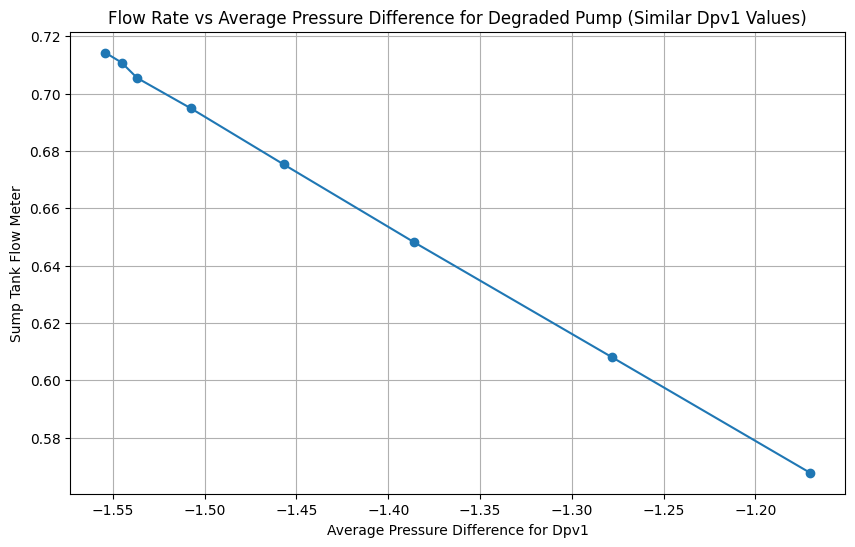

In [59]:
# Extract the degraded pump DataFrame
degraded_pump_df = dfs_by_folder['clogged filter']

# Group by 'Dpv1' and calculate the average of 'Pre Valve Pressure Transducer' minus 'Post Filter Pressure Transducer'
grouped_df = degraded_pump_df.groupby('Dpv1').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Plot Sump Tank Flow Meter vs Average Pressure Difference for similar values of Dpv1
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Pressure Difference'], grouped_df['Sump Tank Flow Meter'], marker='o', linestyle='-')
plt.xlabel('Average Pressure Difference for Dpv1')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Degraded Pump (Similar Dpv1 Values)')
plt.grid(True)
plt.show()


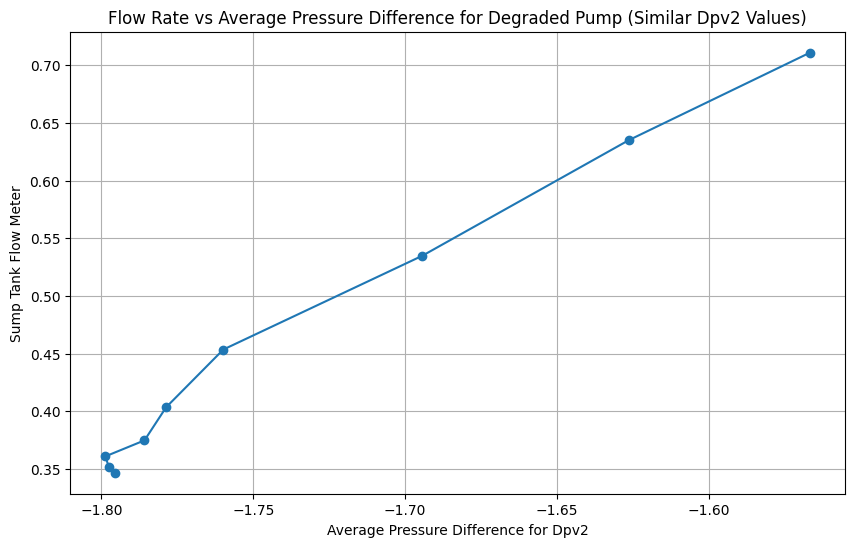

In [48]:
# Extract the degraded pump DataFrame
degraded_pump_df = dfs_by_folder['degraded pump']

# Group by 'Dpv2' and calculate the average of 'Pre Valve Pressure Transducer' minus 'Post Filter Pressure Transducer'
grouped_df = degraded_pump_df.groupby('Dpv2').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Plot Sump Tank Flow Meter vs Average Pressure Difference for similar values of Dpv2
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Pressure Difference'], grouped_df['Sump Tank Flow Meter'], marker='o', linestyle='-')
plt.xlabel('Average Pressure Difference for Dpv2')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Degraded Pump (Similar Dpv2 Values)')
plt.grid(True)
plt.show()


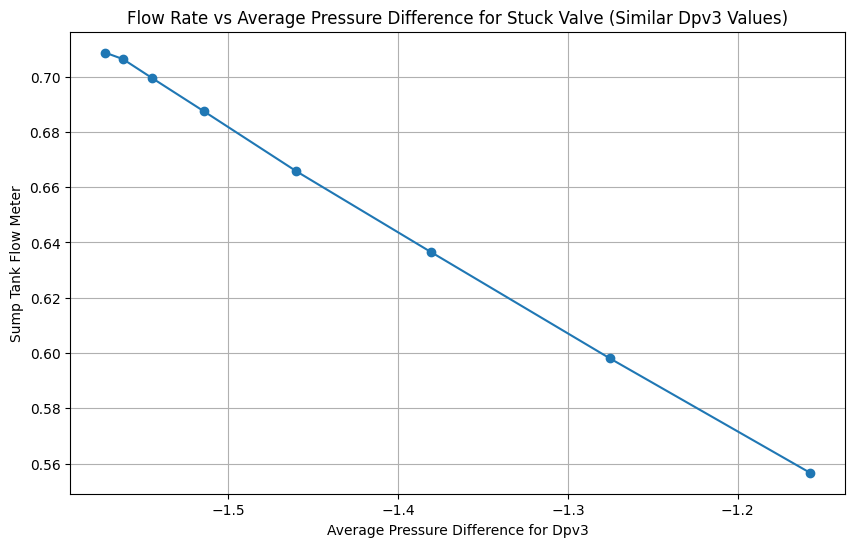

In [49]:
# Extract the stuck valve DataFrame
stuck_valve_df = dfs_by_folder['stuck valve']

# Group by 'Dpv3' and calculate the average of 'Pre Valve Pressure Transducer' minus 'Post Filter Pressure Transducer'
grouped_df = stuck_valve_df.groupby('Dpv3').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Plot Sump Tank Flow Meter vs Average Pressure Difference for similar values of Dpv3
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Pressure Difference'], grouped_df['Sump Tank Flow Meter'], marker='o', linestyle='-')
plt.xlabel('Average Pressure Difference for Dpv3')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Stuck Valve (Similar Dpv3 Values)')
plt.grid(True)
plt.show()


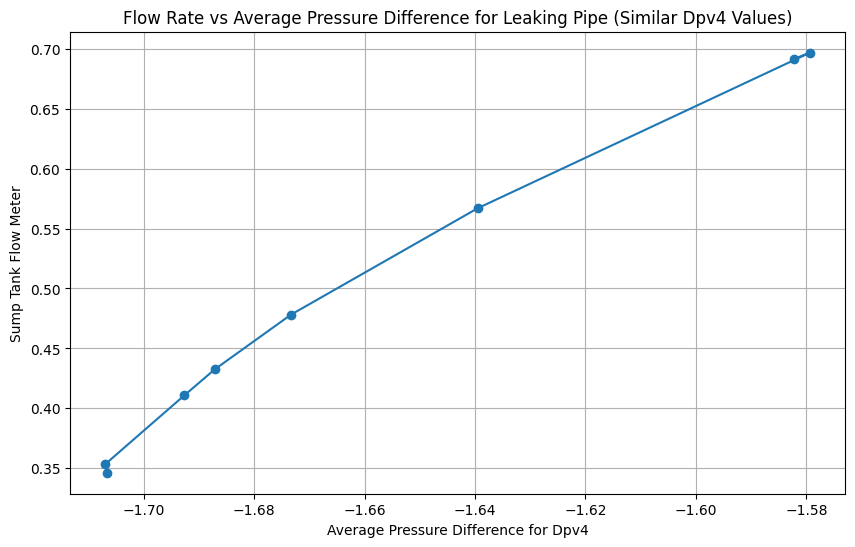

In [50]:
# Extract the leaking pipe DataFrame
leaking_pipe_df = dfs_by_folder['leaking pipe']

# Group by 'Dpv4' and calculate the average of 'Pre Valve Pressure Transducer' minus 'Post Filter Pressure Transducer'
grouped_df = leaking_pipe_df.groupby('Dpv4').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Plot Sump Tank Flow Meter vs Average Pressure Difference for similar values of Dpv4
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Pressure Difference'], grouped_df['Sump Tank Flow Meter'], marker='o', linestyle='-')
plt.xlabel('Average Pressure Difference for Dpv4')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Leaking Pipe (Similar Dpv4 Values)')
plt.grid(True)
plt.show()


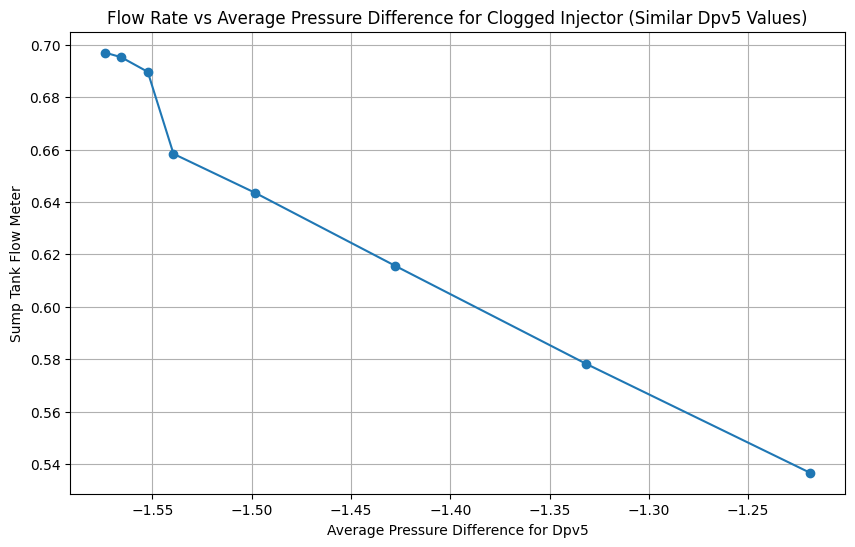

In [51]:
# Extract the clogged injector DataFrame
clogged_injector_df = dfs_by_folder['clogged injector']

# Group by 'Dpv5' and calculate the average of 'Pre Valve Pressure Transducer' minus 'Post Filter Pressure Transducer'
grouped_df = clogged_injector_df.groupby('Dpv5').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_df['Pressure Difference'] = grouped_df['Pre Valve Pressure Transducer'] - grouped_df['Post Filter Pressure Transducer']

# Plot Sump Tank Flow Meter vs Average Pressure Difference for similar values of Dpv5
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Pressure Difference'], grouped_df['Sump Tank Flow Meter'], marker='o', linestyle='-')
plt.xlabel('Average Pressure Difference for Dpv5')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Clogged Injector (Similar Dpv5 Values)')
plt.grid(True)
plt.show()


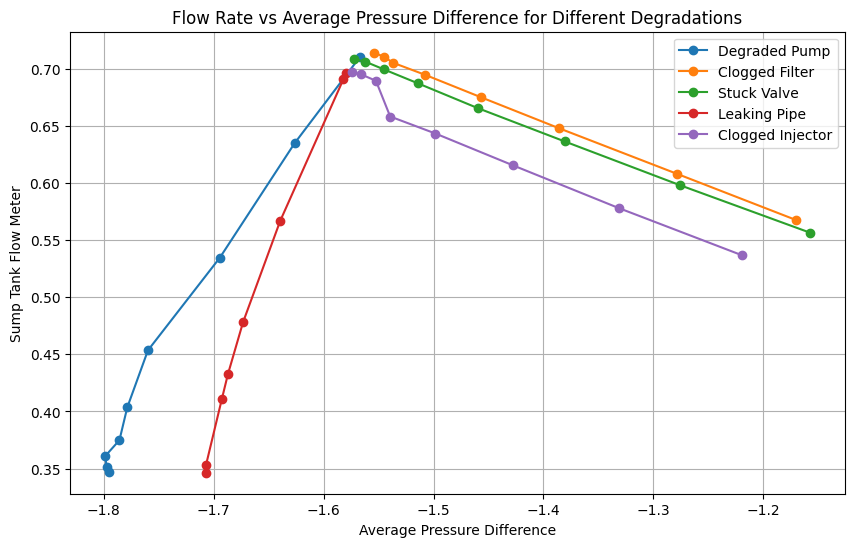

In [60]:
plt.figure(figsize=(10, 6))

# Plot for degraded pump
degraded_pump_df = dfs_by_folder['degraded pump']
grouped_degraded_pump = degraded_pump_df.groupby('Dpv2').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_degraded_pump['Pressure Difference'] = grouped_degraded_pump['Pre Valve Pressure Transducer'] - grouped_degraded_pump['Post Filter Pressure Transducer']
plt.plot(grouped_degraded_pump['Pressure Difference'], grouped_degraded_pump['Sump Tank Flow Meter'], marker='o', linestyle='-', label='Degraded Pump')

# Plot for clogged filter
clogged_filter_df = dfs_by_folder['clogged filter']
grouped_clogged_filter = clogged_filter_df.groupby('Dpv1').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_clogged_filter['Pressure Difference'] = grouped_clogged_filter['Pre Valve Pressure Transducer'] - grouped_clogged_filter['Post Filter Pressure Transducer']
plt.plot(grouped_clogged_filter['Pressure Difference'], grouped_clogged_filter['Sump Tank Flow Meter'], marker='o', linestyle='-', label='Clogged Filter')

# Plot for stuck valve
stuck_valve_df = dfs_by_folder['stuck valve']
grouped_stuck_valve = stuck_valve_df.groupby('Dpv3').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_stuck_valve['Pressure Difference'] = grouped_stuck_valve['Pre Valve Pressure Transducer'] - grouped_stuck_valve['Post Filter Pressure Transducer']
plt.plot(grouped_stuck_valve['Pressure Difference'], grouped_stuck_valve['Sump Tank Flow Meter'], marker='o', linestyle='-', label='Stuck Valve')

# Plot for leaking pipe
leaking_pipe_df = dfs_by_folder['leaking pipe']
grouped_leaking_pipe = leaking_pipe_df.groupby('Dpv4').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_leaking_pipe['Pressure Difference'] = grouped_leaking_pipe['Pre Valve Pressure Transducer'] - grouped_leaking_pipe['Post Filter Pressure Transducer']
plt.plot(grouped_leaking_pipe['Pressure Difference'], grouped_leaking_pipe['Sump Tank Flow Meter'], marker='o', linestyle='-', label='Leaking Pipe')

# Plot for clogged injector
clogged_injector_df = dfs_by_folder['clogged injector']
grouped_clogged_injector = clogged_injector_df.groupby('Dpv5').agg({'Pre Valve Pressure Transducer': 'mean', 'Post Filter Pressure Transducer': 'mean', 'Sump Tank Flow Meter': 'mean'})
grouped_clogged_injector['Pressure Difference'] = grouped_clogged_injector['Pre Valve Pressure Transducer'] - grouped_clogged_injector['Post Filter Pressure Transducer']
plt.plot(grouped_clogged_injector['Pressure Difference'], grouped_clogged_injector['Sump Tank Flow Meter'], marker='o', linestyle='-', label='Clogged Injector')

plt.xlabel('Average Pressure Difference')
plt.ylabel('Sump Tank Flow Meter')
plt.title('Flow Rate vs Average Pressure Difference for Different Degradations')
plt.grid(True)
plt.legend()
plt.show()
